In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
initial_price = 500
annual_sales = 5  # in millions
us_housing_stock = 144 # in millions
days_in_year = 365
n_comps = 5
prob_sale_per_year = annual_sales / us_housing_stock
prob_sale_per_day = prob_sale_per_year / days_in_year
prob_sale_per_year

0.034722222222222224

In [85]:
days_since_start = np.arange(int(10 * days_in_year))
years_since_start = days_since_start / days_in_year

def get_price_trajectory(min_buyside_comm, max_buyside_comm, n_homes=1000, commission_offered_by_seller=0.03,
                         seed=123, prob_unrepresented=0):

    last_five_comp_values = [initial_price] * n_comps

    np.random.seed(seed)
    fair_market_value_by_day = []
    for day_idx in days_since_start:
        does_home_sell_on_given_day = np.random.binomial(n=1, p=prob_sale_per_day, size=n_homes)
        homes_that_sell_on_given_day = np.where(does_home_sell_on_given_day == 1)[0]
        for home_that_sells in homes_that_sell_on_given_day:
            appraised_value = np.mean(last_five_comp_values)
            is_buyer_unrepresented = np.random.binomial(n=1, p=prob_unrepresented, size=1)[0]
            negotiated_buyside_comm = (0 if is_buyer_unrepresented else 
                                       np.random.uniform(min_buyside_comm, max_buyside_comm, 1)[0])
            reduction_in_sale_price = appraised_value * (commission_offered_by_seller - 
                                                         negotiated_buyside_comm)
            sale_price = appraised_value - reduction_in_sale_price
            last_five_comp_values = [sale_price] + last_five_comp_values[:-1]
        fair_market_value_by_day.append(np.mean(last_five_comp_values))
    
    plt.figure(figsize=(20, 10))
    plt.plot(years_since_start, fair_market_value_by_day)
    plt.xlabel('years since proposed settlement goes into effect')
    plt.ylabel('appraised value of any given home')
    plt.ylim(bottom=-10)
    yticks = plt.yticks()[0]
    for ytick in yticks[1:-1]:
        plt.axhline(y=ytick, color='k', linestyle='--', alpha=0.2)
    plt.yticks(yticks[1: -1], [f'${int(y)}K' for y in yticks[1: -1]])
    plt.show()
    
    return fair_market_value_by_day

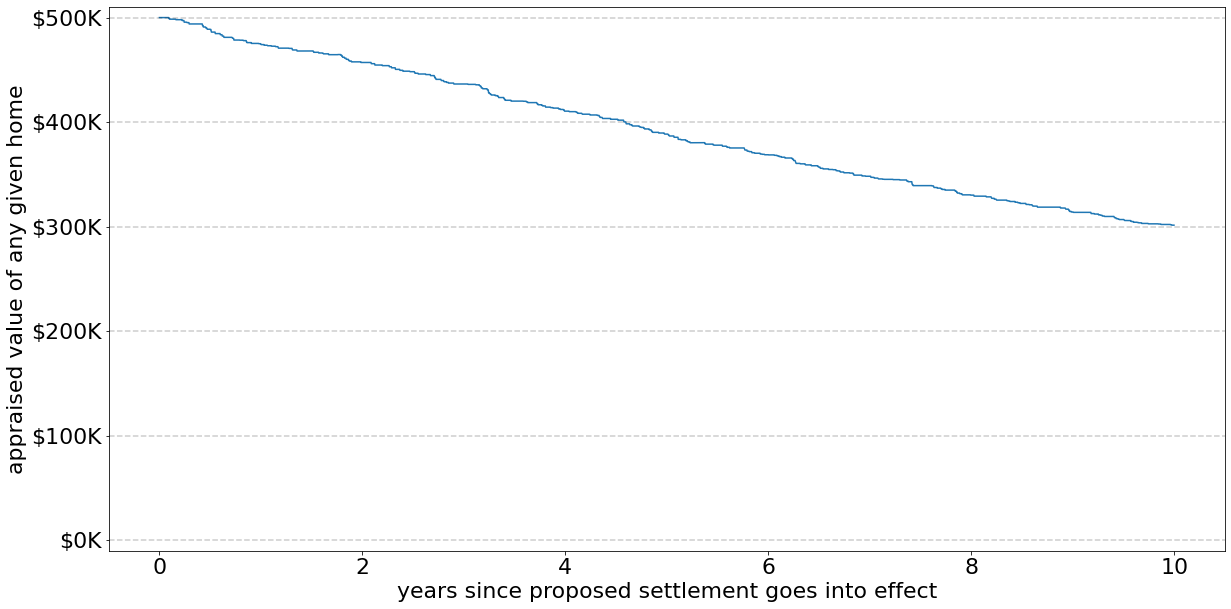

In [86]:
fair_market_value_by_day_1 = get_price_trajectory(0.02, 0.03, n_homes=1000, commission_offered_by_seller=0.03,
                                                  seed=4)

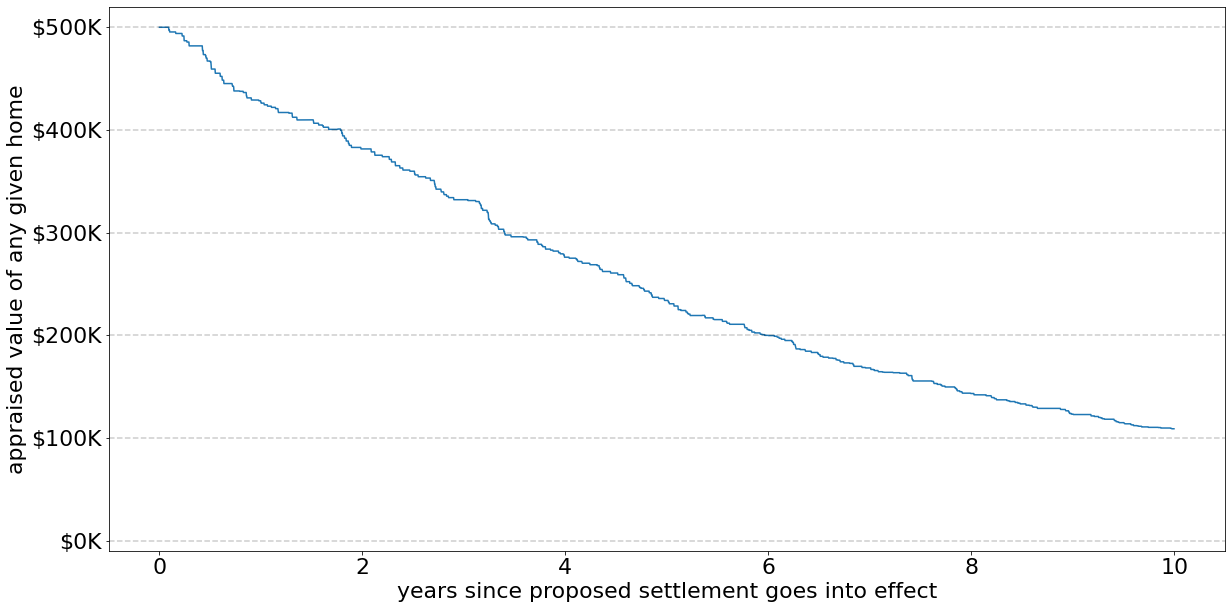

In [87]:
fair_market_value_by_day_2 = get_price_trajectory(0, 0.03, n_homes=1000, commission_offered_by_seller=0.03,
                                                  seed=4)

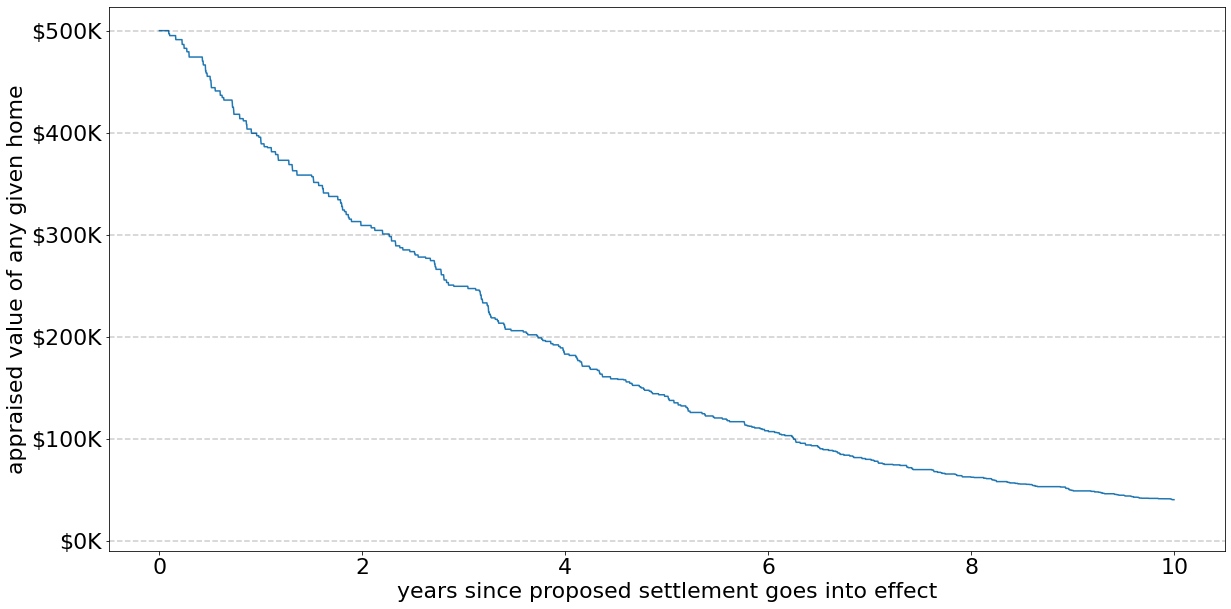

In [92]:
fair_market_value_by_day_3 = get_price_trajectory(0, 0.03, n_homes=1000, commission_offered_by_seller=0.03,
                                                  seed=4, prob_unrepresented=0.5)

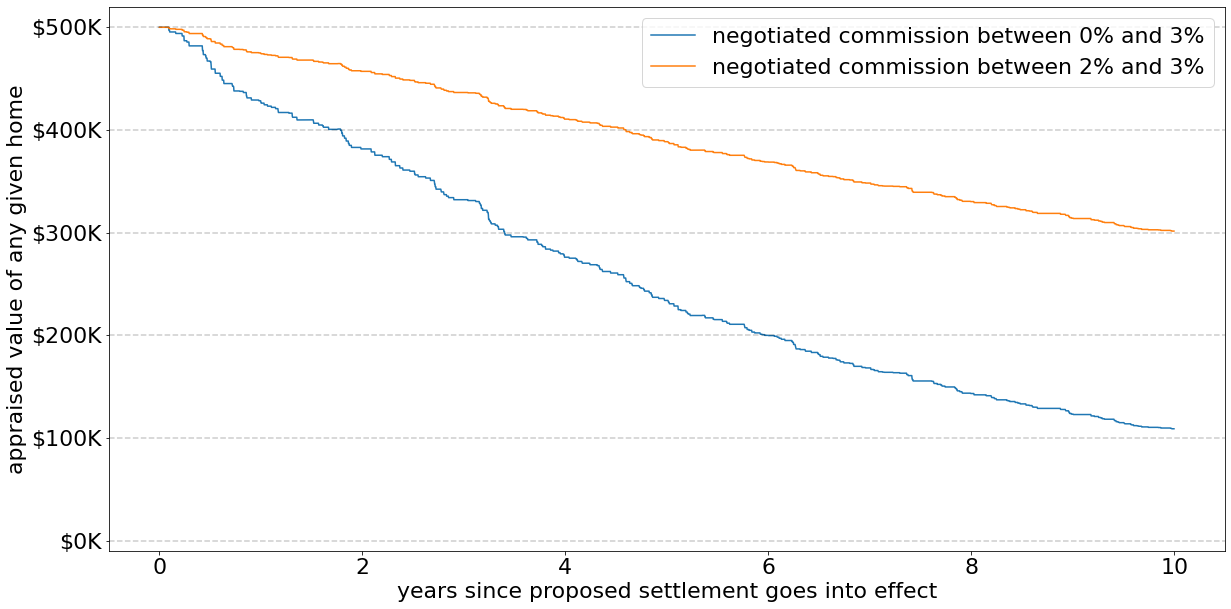

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(years_since_start, fair_market_value_by_day_2, label='negotiated commission between 0% and 3%')
plt.plot(years_since_start, fair_market_value_by_day_1, label='negotiated commission between 2% and 3%')
plt.xlabel('years since proposed settlement goes into effect')
plt.ylabel('appraised value of any given home')
plt.ylim(bottom=-10)
yticks = plt.yticks()[0]
for ytick in yticks[1: -1]:
    plt.axhline(y=ytick, color='k', linestyle='--', alpha=0.2)
plt.yticks(yticks[1: -1], [f'${int(y)}K' for y in yticks[1: -1]])
plt.legend(loc='upper right')
plt.show()

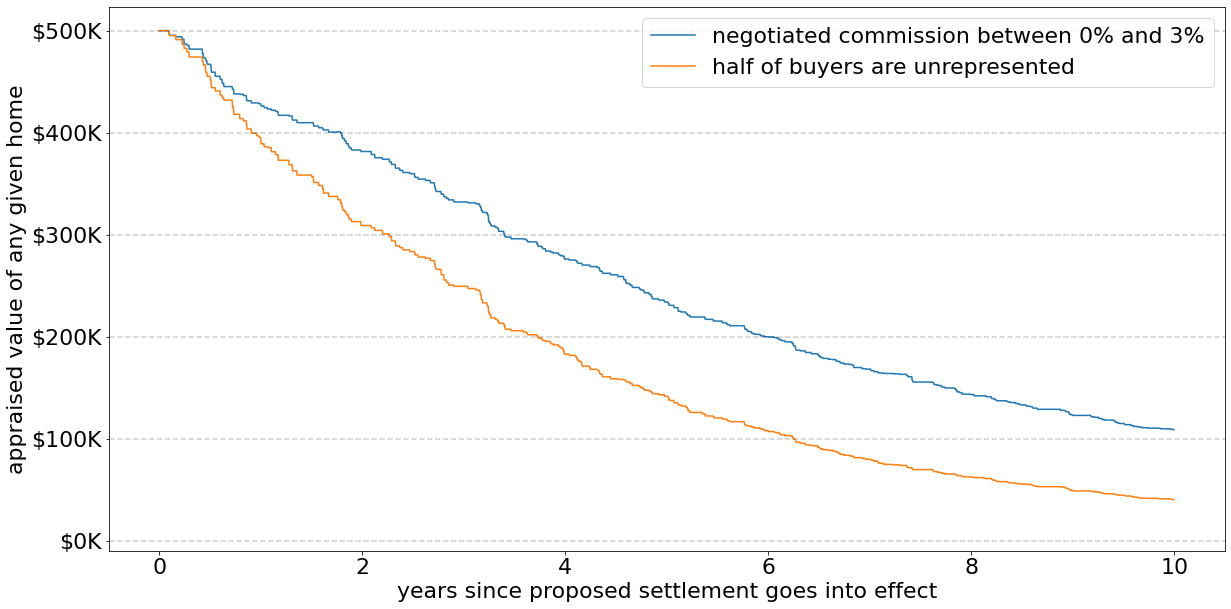

In [94]:
plt.figure(figsize=(20, 10))
plt.plot(years_since_start, fair_market_value_by_day_2, label='negotiated commission between 0% and 3%')
plt.plot(years_since_start, fair_market_value_by_day_3, label='half of buyers are unrepresented')
plt.xlabel('years since proposed settlement goes into effect')
plt.ylabel('appraised value of any given home')
plt.ylim(bottom=-10)
yticks = plt.yticks()[0]
for ytick in yticks[1: -1]:
    plt.axhline(y=ytick, color='k', linestyle='--', alpha=0.2)
plt.yticks(yticks[1: -1], [f'${int(y)}K' for y in yticks[1: -1]])
plt.legend(loc='upper right')
plt.show()

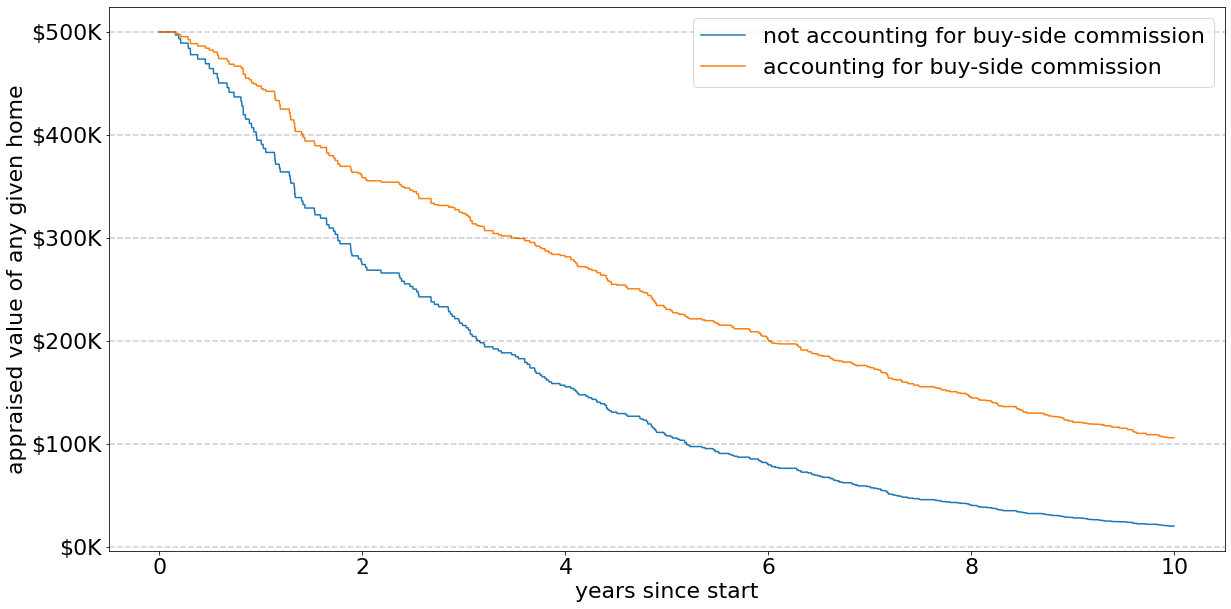

In [31]:
plt.figure(figsize=(20, 10))
plt.plot(years_since_start, fair_market_value_by_day_1, label='not accounting for buy-side commission')
plt.plot(years_since_start, fair_market_value_by_day_2, label='accounting for buy-side commission')
plt.xlabel('years since start')
plt.ylabel('appraised value of any given home')
yticks = plt.yticks()[0]
for ytick in yticks[1: -1]:
    plt.axhline(y=ytick, color='k', linestyle='--', alpha=0.2)
plt.yticks(yticks[1: -1], [f'${int(y)}K' for y in yticks[1: -1]])
plt.legend(loc='upper right')
plt.show()

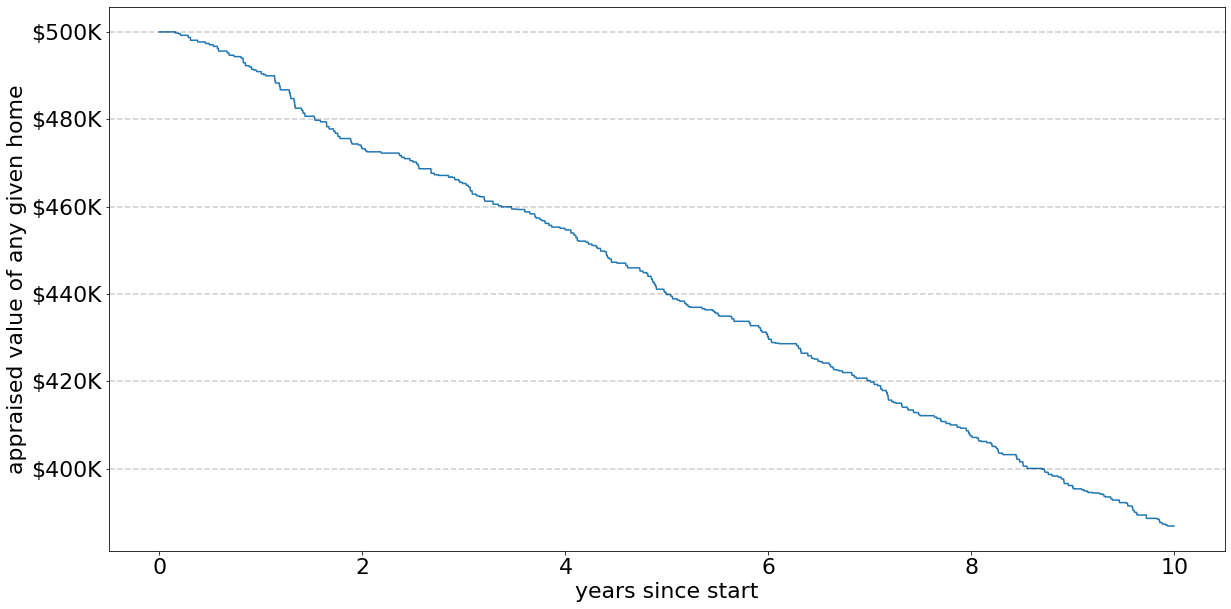

In [35]:
fair_market_value_by_day_3 = get_price_trajectory(0.025, 0.03, commission_offered_by_seller=0.03)

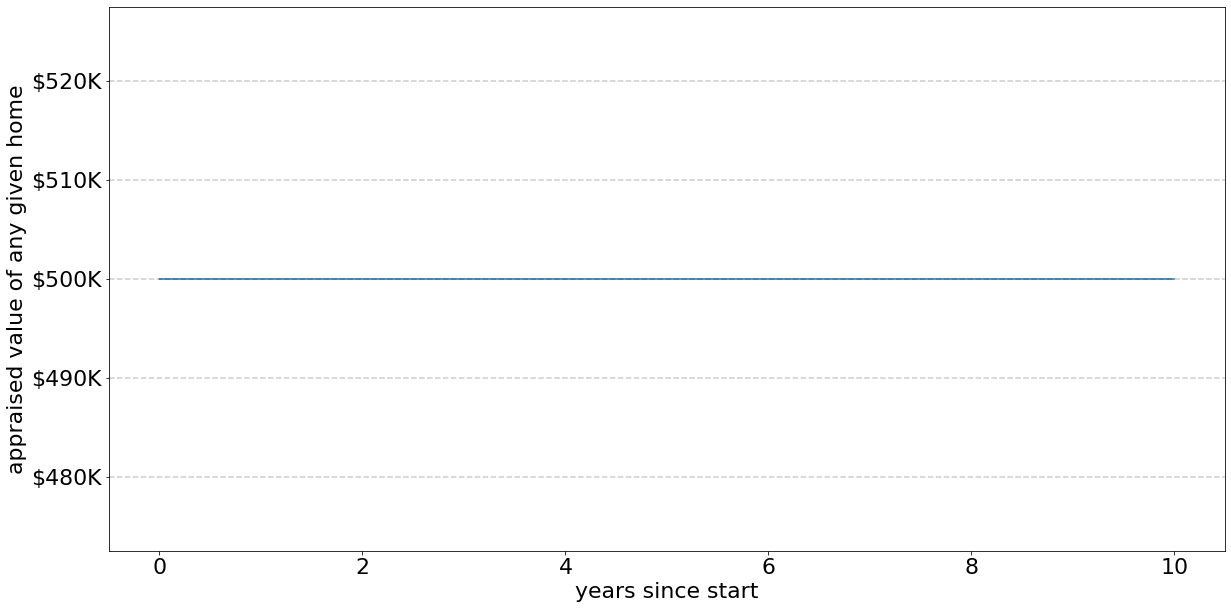

In [36]:
fair_market_value_by_day_2 = get_price_trajectory(0.03, 0.03, commission_offered_by_seller=0.03)